# Tutorial

## Computing contours of a custom function
The function defines a 3d surface, for which we will compute its contours.

We start by importing our library and some plotting functions.

In [1]:
import numpy as np

from fermi_contours import marching_squares as ms

from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


The custom function can be anything that takes two floats and returns another float.
If the function is expensive to compute in a serial way, consider computing the `grid_values` elsewhere, and provide the values instead of the function.

In [2]:
def surface(x, y):
    return x ** 2 + y ** 2


To instantiate our `MarchingSquares` class, we need to provide the bounds of the grid. These bounds will be used to scale the position of the contours.

In [3]:
squares = ms.MarchingSquares(
    func=surface,
    res=[20, 10],
    bounds=[[-2,2], [-1, 1]],
)


At this point, the `squares` instance has extracted the `grid_points` and their `grid_values`.
If these are not provided, the `grid_points` are computed them using the `res` and `bounds` parameters, and the `grid_values` are the evaluations of `func` on those points.

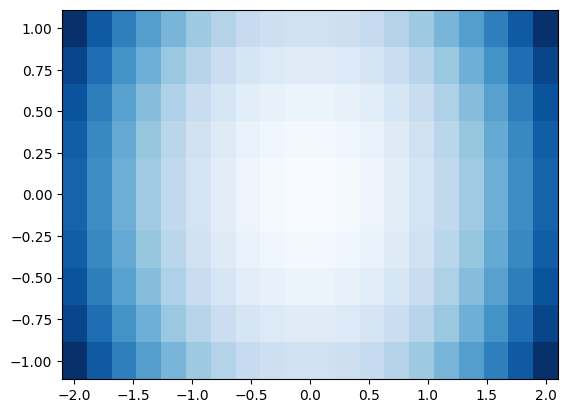

In [4]:
X, Y = np.meshgrid(*squares.grid_points)
plt.pcolormesh(X, Y, squares.grid_values.T, cmap="Blues");


### Computing contours
Now, we just call our instance with the values of the levels for which we want to compute the contour.

In [5]:
levels = np.linspace(0, 1, 21)
levels


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [6]:
contours = [squares(l) for l in levels]


/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (8, 3).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (7, 3).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (8, 2).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (10, 5).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (7, 2).
  warn(f"Stepping outside the initial path with ce

To visualize the contours, we can plot the `grid_values` in blue, and the set of contours in orange.

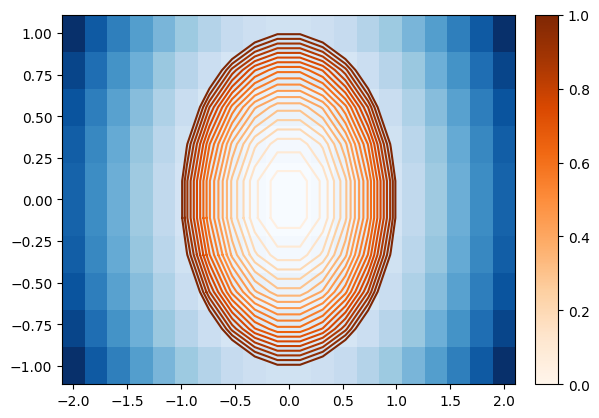

In [7]:
fig, ax = plt.subplots()


n = len(levels)
color_list = plt.cm.Oranges(np.linspace(0, 1, n))

cmap = plt.cm.Oranges
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])

for i, contour in enumerate(contours):
    ax.plot(*np.array(contour).T, color=color_list[i])


divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.2)
fig.add_axes(cax)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
X, Y = np.meshgrid(*squares.grid_points)
ax.pcolormesh(X, Y, squares.grid_values.T, cmap="Blues");


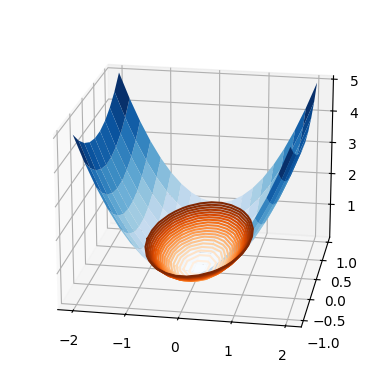

In [8]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d', computed_zorder=False))

X, Y = np.meshgrid(*squares.grid_points)
ax.plot_surface(X, Y, squares.grid_values.T, alpha=1, cmap="Blues")
ax.view_init(azim=-80, elev=20)

n = len(levels)
color_list = plt.cm.Oranges(np.linspace(0, 1, n))

cmap = plt.cm.Oranges
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])

for i, (level, contour) in enumerate(zip(levels, contours)):
    if len(contour) > 0:
        _x, _y = np.array(contour).T
        _z = np.ones(len(_x))[:, None] * level
        ax.plot(_x, _y, _z, color=color_list[i])


## Special cases

### Open contours

It may happen that our contour is not closed, or at least not within the bounds that we want.
In this case, we can set the parameter `open_contours=True` to allow this behaviour.
This can also lead to more than one contour per level


In [9]:
levels_open = np.linspace(0, 5, 21)
levels_open


array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [10]:
contours_open = [squares(l) for l in levels_open]


/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (4, 1).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (5, 0).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (4, 2).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (4, 4).
  warn(f"Stepping outside the initial path with cell {ij}.")
/home/pablo/work/fermi-contours/src/fermi_contours/marching_squares.py:277: UserWarning: Stepping outside the initial path with cell (4, 5).
  warn(f"Stepping outside the initial path with cel

To visualize the contours, we can plot the `grid_values` in blue, and the set of contours in orange.

In [16]:
contours_open[6]


[[(-1.1769615009746588, -0.33333333333333337),
  (-1.1578947368421053, -0.387523084025854),
  (-1.0869476933073425, -0.5555555555555556),
  (-0.9473684210526316, -0.7759438801682568),
  (-0.9459165854450942, -0.7777777777777778),
  (-0.736842105263158, -0.9758483379501384),
  (-0.7028508771929824, -1.0)],
 [(-1.2160561511804202, -0.11111111111111116),
  (-1.1769615009746588, -0.33333333333333337),
  (-1.1578947368421053, -0.387523084025854),
  (-1.0869476933073425, -0.5555555555555556),
  (-0.9473684210526316, -0.7759438801682568),
  (-0.9459165854450942, -0.7777777777777778),
  (-0.736842105263158, -0.9758483379501384),
  (-0.7028508771929824, -1.0)],
 [(-1.2160561511804202, 0.11111111111111116),
  (-1.2160561511804202, -0.11111111111111116),
  (-1.1769615009746588, -0.33333333333333337),
  (-1.1578947368421053, -0.387523084025854),
  (-1.0869476933073425, -0.5555555555555556),
  (-0.9473684210526316, -0.7759438801682568),
  (-0.9459165854450942, -0.7777777777777778),
  (-0.7368421052

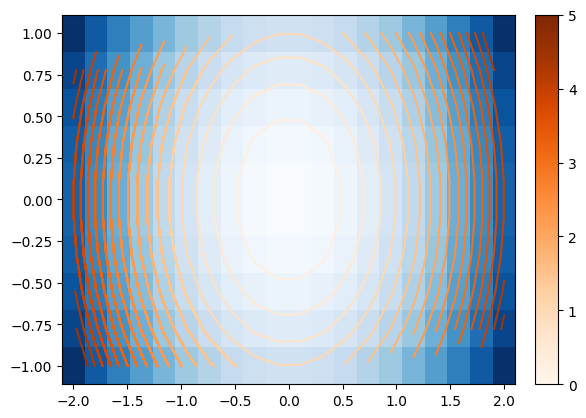

In [17]:
fig, ax = plt.subplots()


n = len(levels_open)
color_list = plt.cm.Oranges(np.linspace(0, 1, n))

cmap = plt.cm.Oranges
norm = colors.Normalize(vmin=levels_open[0], vmax=levels_open[-1])

for i, contours_per_level in enumerate(contours_open):
    for contour in contours_per_level:

        ax.plot(*np.array(contour).T, color=color_list[i])


divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.2)
fig.add_axes(cax)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
X, Y = np.meshgrid(*squares.grid_points)
ax.pcolormesh(X, Y, squares.grid_values.T, cmap="Blues");


ValueError: input operand has more dimensions than allowed by the axis remapping

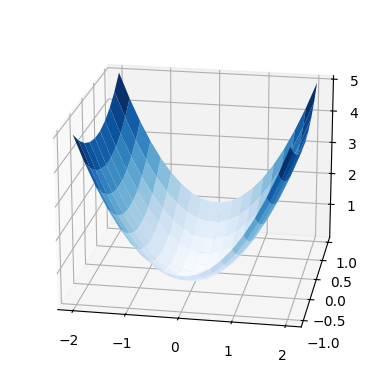

In [18]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d', computed_zorder=False))

X, Y = np.meshgrid(*squares.grid_points)
ax.plot_surface(X, Y, squares.grid_values.T, alpha=1, cmap="Blues")
ax.view_init(azim=-80, elev=20)

n = len(levels_open)
color_list = plt.cm.Oranges(np.linspace(0, 1, n))

cmap = plt.cm.Oranges
norm = colors.Normalize(vmin=levels_open[0], vmax=levels_open[-1])

for i, (level, contours_per_level) in enumerate(zip(levels, contours)):
    for contour in contours_per_level:
        if len(contour) > 0:
            _x, _y = np.array(contour)[None, :].T
            _z = np.ones(len(_x))[:, None] * level
            ax.plot(_x, _y, _z, color=color_list[i])




### Periodic boundaries
If we want that contours wrap around the edges of our grid, we can set the parameter `periodic=True`.